## 資料分析

### load 

In [1]:
import pandas as pd


In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")


In [3]:
train_data.head()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [12]:
# print(train_data.info())
na_summary = pd.DataFrame({
    'NaN Count': train_data.isna().sum(),
    'NaN Percentage (%)': (train_data.isna().sum() / len(train_data)) * 100
}).sort_values(by='NaN Count', ascending=False)

print("train_data：")
print(na_summary)

na_summary_test = pd.DataFrame({
    'NaN Count': test_data.isna().sum(),
    'NaN Percentage (%)': (test_data.isna().sum() / len(test_data)) * 100
}).sort_values(by='NaN Count', ascending=False)

print("test_data：")
print(na_summary_test)


train_data：
                                       NaN Count  NaN Percentage (%)
Study Satisfaction                        112803           80.172708
Academic Pressure                         112803           80.172708
CGPA                                      112802           80.171997
Profession                                 36630           26.034115
Work Pressure                              27918           19.842217
Job Satisfaction                           27910           19.836532
Dietary Habits                                 4            0.002843
Financial Stress                               4            0.002843
Degree                                         2            0.001421
Family History of Mental Illness               0            0.000000
Work/Study Hours                               0            0.000000
Have you ever had suicidal thoughts ?          0            0.000000
id                                             0            0.000000
Sleep Duration        

## 看 Depression 比例

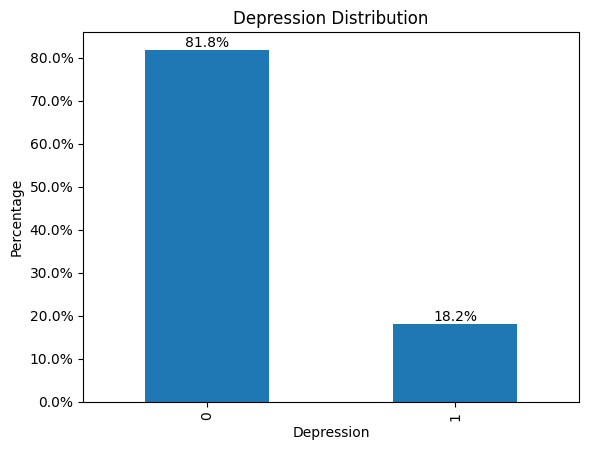

In [10]:
import matplotlib.pyplot as plt

# 計算比例
depression_ratio = train_data['Depression'].value_counts(normalize=True)

# 繪製長條圖
depression_ratio.plot(kind='bar')
plt.title('Depression Distribution')
plt.xlabel('Depression')
plt.ylabel('Percentage')

# 將y軸顯示為百分比格式
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# 在每個長條上添加百分比標籤
for i, v in enumerate(depression_ratio):
    plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')

plt.savefig('images/depression_distribution_original.png')
plt.show()